<a href="https://www.kaggle.com/code/sivarajsingh/portfolio-ml-k-means-clustering?scriptVersionId=138914525" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import pandas as pd
import os 

for dirname, _,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


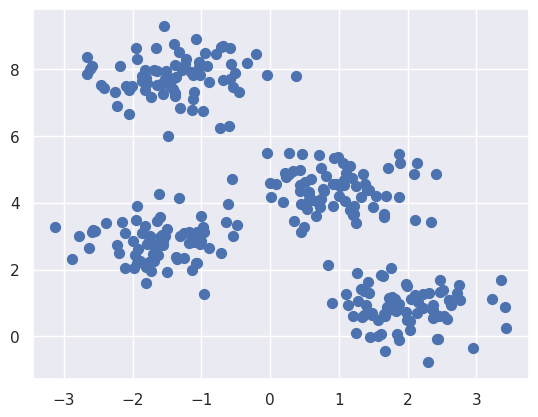

In [3]:
# Demo - K Means Clustering
import matplotlib.pyplot as plt
%matplotlib inline

#for plot styling 
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300,centers=4, cluster_std=0.60,random_state=0)
plt.scatter(X[:, 0],X[:, 1],s=50)

In [4]:
#K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.fit_predict(X)
y_pred

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 3, 1, 3, 2, 2, 0, 1, 3, 3, 0, 3, 1, 3, 2, 1, 1, 2, 0, 0, 2, 2,
       1, 0, 0, 1, 2, 1, 0, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 2, 1, 0, 1, 1,
       0, 0, 3, 0, 3, 2, 0, 2, 3, 2, 2, 0, 3, 0, 3, 2, 3, 1, 3, 0, 0, 0,
       3, 2, 3, 0, 1, 0, 3, 0, 0, 3, 0, 1, 2, 3, 2, 1, 2, 2, 3, 1, 2, 1,
       3, 3, 1, 2, 3, 0, 0, 1, 2, 2, 1, 0, 3, 2, 3, 2, 1, 2, 2, 1, 3, 1,
       0, 0, 2, 3, 2, 1, 3, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0,
       0, 2, 3, 0, 0, 3, 1, 3, 3, 0, 1, 0, 1, 0, 3, 1, 3, 3, 3, 1, 3, 1,
       2, 0, 3, 0, 2, 1, 3, 1, 1, 2, 1, 0, 0, 1, 2, 1, 1, 3, 2, 1, 0, 3,
       2, 2, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 3, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 3, 1, 0, 2, 0, 1, 3, 0, 3, 1, 3, 1, 0, 1, 1, 3, 0, 0, 2, 2, 1,
       3, 2, 2, 0, 2, 0, 1, 3, 3, 1, 1, 3, 1, 2, 0, 1, 2, 0, 3, 0, 2, 1,
       2, 3, 3, 3, 3, 0, 0, 3, 1, 0, 2, 1, 0, 0, 0, 2, 2, 3, 1, 1, 0, 2,
       3, 0, 1, 3, 1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 3, 3, 2, 2, 1, 2, 2, 2,
       3, 0, 3, 1, 2, 2, 3, 3, 3, 2, 2, 1, 3, 0], d

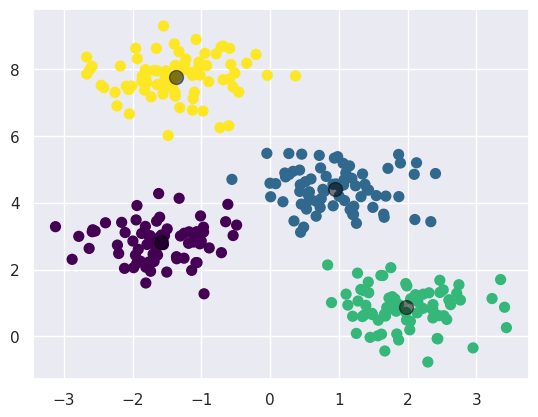

In [5]:
# Rough implementation of K-Means Algorithm
# assign each of the points to the centeriod , and check whether they are optimal distance, which is the shortest distance
#in which assign the each of the data points to the centroids 
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    #1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    
    while True:
    #2. assign label based on closest center
        labels = pairwise_distances_argmin(X,centers)
        
    #3. Find new centers from mean of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
    
    #4. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X,4)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black',s=100,alpha=0.5)

In [6]:
# Exploring the code

import numpy as np 

a = np.random.RandomState(2)
print(a)
i = a.permutation(300)[:4]
print(i)
print(X[i])
labels = pairwise_distances_argmin(X,X[i])
print(labels)
print(X[labels == 0].mean(0))

RandomState(MT19937)
[ 98 259 184 256]
[[ 0.27239604  5.46996004]
 [-1.36999388  7.76953035]
 [ 0.08151552  4.56742235]
 [-0.6149071   3.94963585]]
[3 1 0 1 3 2 3 2 1 1 3 1 2 1 3 2 2 3 3 3 2 3 0 3 3 2 3 2 3 2 1 1 2 1 1 1 1
 1 3 3 2 3 0 2 3 3 1 3 1 3 3 3 1 3 2 3 1 3 1 3 1 2 1 3 3 3 1 3 1 3 2 3 1 3
 3 1 3 2 3 1 3 2 3 3 1 0 3 0 1 1 2 3 1 3 3 2 3 2 0 3 1 3 1 3 2 3 3 0 1 0 3
 3 3 1 3 2 1 3 3 0 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 1 3 1 1 3 2 3 0 3 1 2
 1 1 1 2 0 2 3 3 1 3 3 0 1 2 2 3 2 3 3 2 3 2 2 1 3 0 3 1 2 3 2 3 3 2 3 3 2
 2 0 2 2 1 3 3 2 2 3 3 3 2 3 1 2 3 3 3 2 1 3 1 2 1 2 3 2 0 1 3 3 3 3 2 1 3
 3 3 3 3 3 1 1 0 2 1 2 3 3 2 3 3 1 3 2 2 2 1 1 1 1 3 3 0 0 3 3 2 3 3 3 3 3
 1 2 2 3 3 1 3 2 1 0 3 3 3 3 2 2 3 3 0 1 1 2 2 2 3 3 2 1 3 1 2 3 3 1 1 1 3
 2 2 1 3]
[0.996244   5.28262763]
